# Dengue prediction

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [3]:
#importing data
df = pd.read_csv("F:\dengue\dengue_features_train.csv")
df_label = pd.read_csv("F:\dengue\dengue_labels_train.csv")
df_test = pd.read_csv("F:\dengue\dengue_features_test.csv")
display(df.head(5), df.shape)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


(1456, 24)

In [4]:
display(df_label.head(),df_label.shape)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


(1456, 4)

In [5]:
display(df_test.head(), df_test.shape)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


(416, 24)

### Data Cleaning

In [6]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [8]:
df_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [9]:
df_test.fillna(df_test.mean(), inplace = True)

### Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

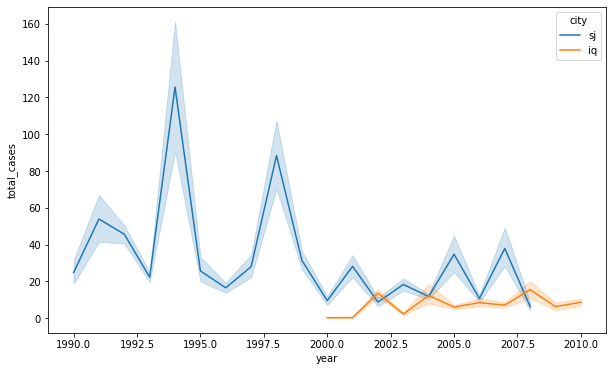

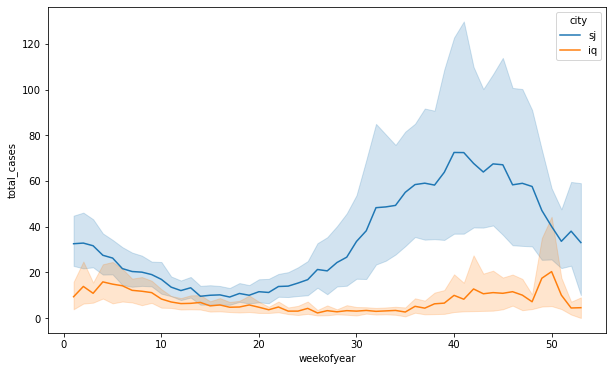

In [11]:
# plotting label
plt.figure(figsize = (10, 6) )
sns.lineplot(data = df_label, x = 'year', y = 'total_cases', hue = 'city' )
plt.show()
plt.figure(figsize = (10,6))
sns.lineplot(data = df_label, x = 'weekofyear', y = 'total_cases', hue = 'city' )
plt.show()

In [12]:
# Correlation Matrix
full_df = df.join(df_label['total_cases'])
corr_mat = full_df.corr()
print(corr_mat['total_cases'].sort_values(ascending = False))

total_cases                              1.000000
reanalysis_min_air_temp_k                0.324776
station_min_temp_c                       0.266227
reanalysis_air_temp_k                    0.264564
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.151415
reanalysis_dew_point_temp_k              0.142322
reanalysis_specific_humidity_g_per_kg    0.129671
station_avg_temp_c                       0.115478
reanalysis_precip_amt_kg_per_m2         -0.010016
precipitation_amt_mm                    -0.038670
reanalysis_sat_precip_amt_mm            -0.038670
station_max_temp_c                      -0.039068
station_precip_mm                       -0.074201
ndvi_se                                 -0.117769
reanalysis_relative_humidity_percent    -0.132259
ndvi_sw                                 -0.137221
ndvi_nw                                 -0.137254
ndvi_ne                                 -0.157320
reanalysis_max_air_temp_k               -0.191066


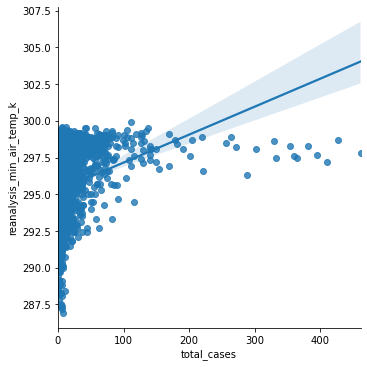

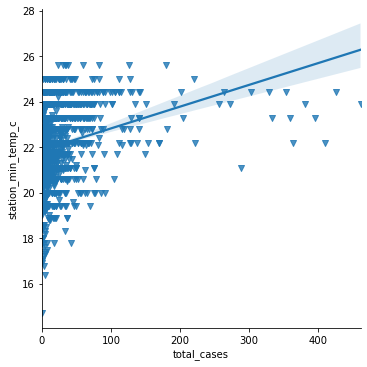

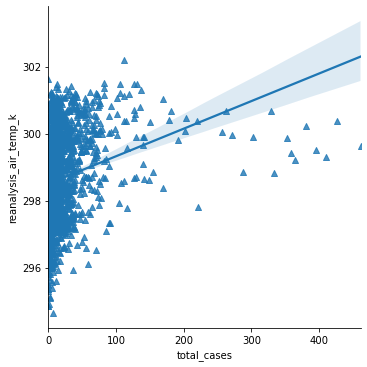

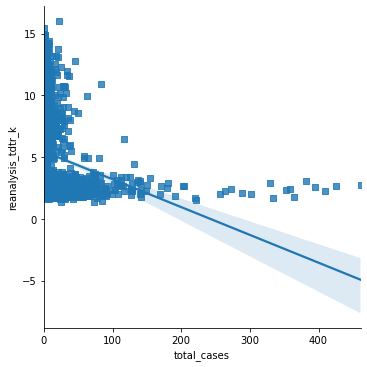

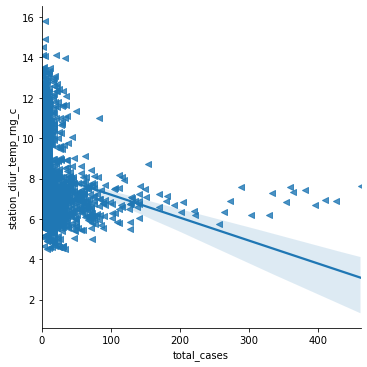

In [13]:
g=sns.lmplot(x='total_cases', y='reanalysis_min_air_temp_k', data=full_df, markers='o')
g=sns.lmplot(x='total_cases', y='station_min_temp_c', data=full_df, markers='v')
g=sns.lmplot(x='total_cases', y='reanalysis_air_temp_k', data=full_df, markers='^')
g=sns.lmplot(x='total_cases', y='reanalysis_tdtr_k', data=full_df, markers='s')
g=sns.lmplot(x='total_cases', y='station_diur_temp_rng_c', data=full_df, markers='<')

C:\Users\Rahil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rahil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='city', ylabel='total_cases'>

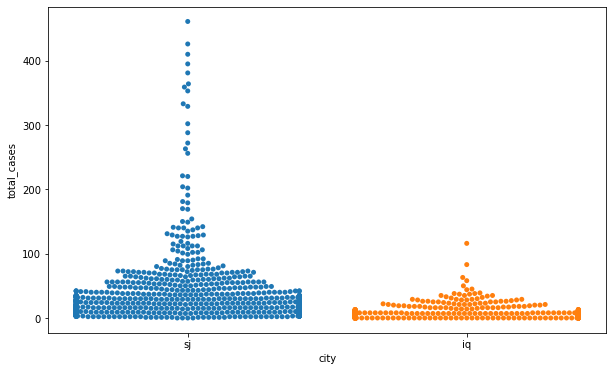

In [14]:
# Plotting the cities
plt.figure(figsize = (10,6))
sns.swarmplot(data = full_df, x = 'city', y = 'total_cases')

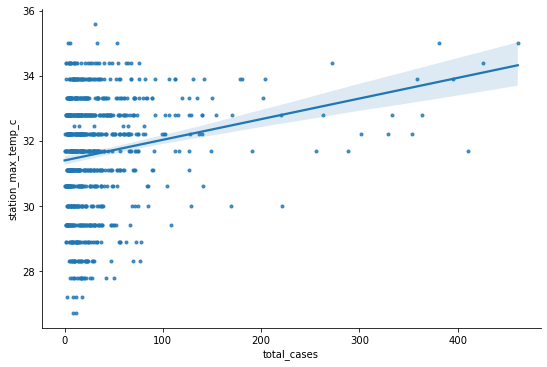

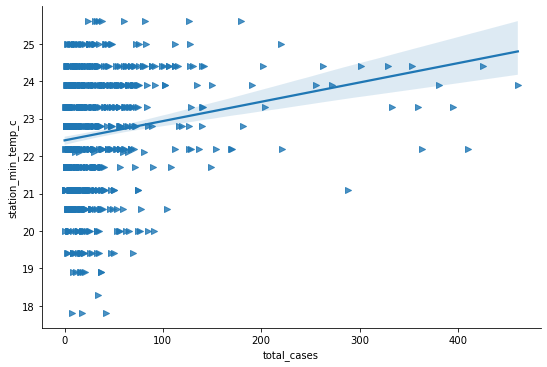

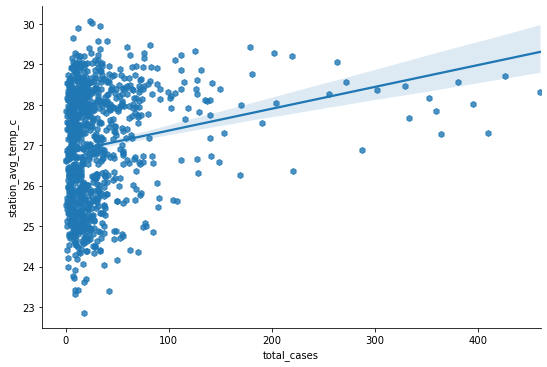

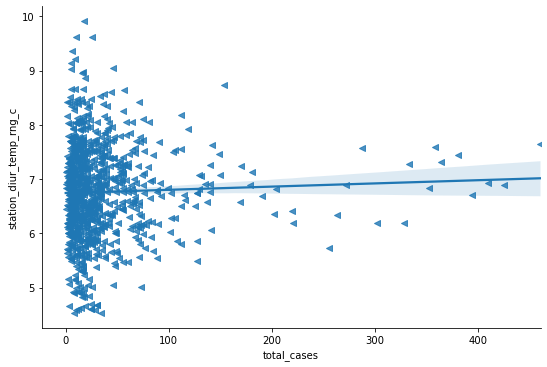

In [15]:
#Seperating City Data to differentiate
city_sj = full_df.loc[full_df['city'] == 'sj']
city_iq = full_df.loc[full_df['city'] == 'iq']
#Plotting San juan city with respect to total cases
sns.lmplot(x='total_cases', y='station_max_temp_c', data=city_sj, markers='.',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='station_min_temp_c', data=city_sj, markers='>', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='station_avg_temp_c', data=city_sj, markers='h', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='station_diur_temp_rng_c', data=city_sj, markers='<',aspect=1.5, x_jitter=.1)

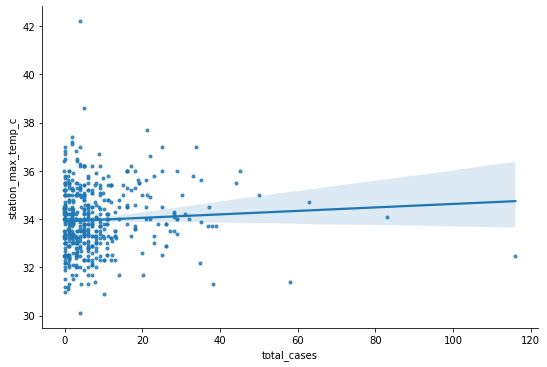

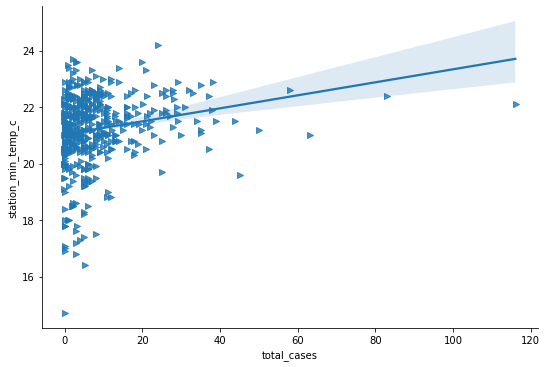

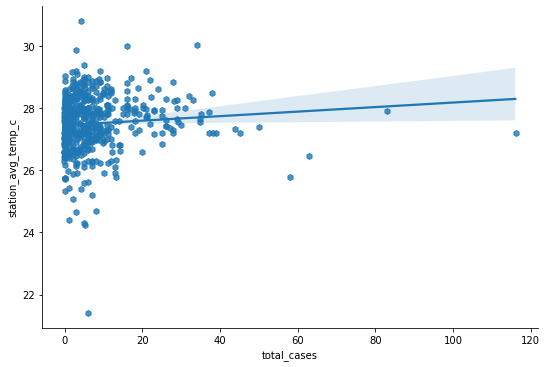

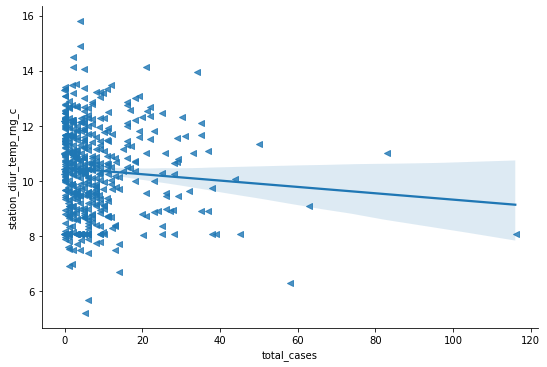

In [16]:
#Plotting Iquitos city with respect to total cases
sns.lmplot(x='total_cases', y='station_max_temp_c', data=city_iq, markers='.',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='station_min_temp_c', data=city_iq, markers='>', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='station_avg_temp_c', data=city_iq, markers='h', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='station_diur_temp_rng_c', data=city_iq, markers='<',aspect=1.5, x_jitter=.1)

In [17]:
x = df.drop(['city', 'weekofyear', 'week_start_date'], axis = 1)
y = full_df['total_cases']

# Model Selection

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### SVC

In [20]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=10)
svm_clf.fit(x,y)

SVC(C=10, coef0=10, kernel='poly')

In [21]:
kfold = KFold(n_splits = 8, shuffle = True , random_state = 0)

In [23]:
import numpy as np
svm_score= cross_val_score(svm_clf, x, y,  cv = kfold, n_jobs = 1, scoring='accuracy')
print(svm_score)
np.mean(svm_score)*100

[0.0989011  0.07692308 0.1043956  0.07692308 0.08791209 0.06043956
 0.09340659 0.08791209]


8.585164835164836

### KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=10)

In [47]:
knn_score = cross_val_score(knn, x, y , cv = kfold, n_jobs = 1, scoring = 'accuracy')
print(knn_score)
np.mean(knn_score)*100

[0.08241758 0.06043956 0.07692308 0.07142857 0.06593407 0.02747253
 0.05494505 0.06043956]


6.25

### Decision Tree

In [50]:
dec_clf = DecisionTreeClassifier(criterion= 'gini')
dec_clf.fit(x, y)

DecisionTreeClassifier()

In [51]:
dec_score = cross_val_score(dec_clf, x, y , cv = kfold, n_jobs = 1, scoring = 'accuracy')
print(dec_score)
np.mean(dec_score)*100

[0.1043956  0.05494505 0.07692308 0.07142857 0.09340659 0.03296703
 0.06043956 0.06043956]


6.936813186813187

### Random Forest Classifier

In [35]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x, y)

RandomForestClassifier()

In [41]:
rf_score = cross_val_score(rf_clf , x, y, cv = kfold , n_jobs = 1, scoring = 'accuracy')
print(rf_score)
np.mean(rf_score)*100

[0.07142857 0.08241758 0.10989011 0.06043956 0.11538462 0.08241758
 0.10989011 0.09340659]


9.065934065934067

In [45]:
y_test = df_test.drop(['weekofyear', 'week_start_date', 'city'], axis= 1)
y_test.head()

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2008,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,2008,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,2008,-0.00150,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,2008,0.12605,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,2008,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [53]:
submission = dec_clf.predict(y_test)

In [61]:
subdf = pd.DataFrame({
    'total' : submission
})
sub_csv = subdf.to_csv('submission_format.csv', index= False)

In [62]:
sub = pd.read_csv('submission_format.csv')
sub.head()

,total
0,18
1,18
2,7
3,4
4,3
